In [ ]:
import redis
import time

# Configuração do cluster Redis
redis_servers = [
    redis.Redis(host="localhost", port=11232),
    redis.Redis(host="localhost", port=11233),
    redis.Redis(host="localhost", port=11234),
    redis.Redis(host="localhost", port=11235),
]

# Testar conexão
for i, client in enumerate(redis_servers, start=1):
    try:
        if client.ping():
            print(f"Conectado com sucesso ao Redis {i} na porta {client.connection_pool.connection_kwargs['port']}")
    except redis.ConnectionError:
        print(f"Falha ao conectar ao Redis {i}")

# Tamanho do dataset
dataset_size = 100000  # Altere aqui para 10000 (1x), 100000 (10x), 1000000 (100x)

# Test data
data = {f'key{i}': f'value{i}' for i in range(dataset_size)}

# Função para distribuir as chaves entre os servidores Redis
def get_redis_client(key):
    return redis_servers[hash(key) % len(redis_servers)]

# Insert (Create)
start_time = time.time()
for key, value in data.items():
    get_redis_client(key).set(key, value)
insert_time = time.time() - start_time

# Read (Get)
start_time = time.time()
for key in data.keys():
    get_redis_client(key).get(key)
read_time = time.time() - start_time

# Update (Set)
start_time = time.time()
for key, value in data.items():
    get_redis_client(key).set(key, f'updated_{value}')
update_time = time.time() - start_time

# Delete (Remove)
start_time = time.time()
for key in data.keys():
    get_redis_client(key).delete(key)
delete_time = time.time() - start_time

# Print results
print(f"Dataset Size: {dataset_size} items")
print(f"Insert Time: {insert_time:.2f} seconds")
print(f"Read Time: {read_time:.2f} seconds")
print(f"Update Time: {update_time:.2f} seconds")
print(f"Delete Time: {delete_time:.2f} seconds")

Conectado com sucesso ao Redis 1 na porta 11232
Conectado com sucesso ao Redis 2 na porta 11233
Conectado com sucesso ao Redis 3 na porta 11234
Conectado com sucesso ao Redis 4 na porta 11235
Dataset Size: 100000 items
Insert Time: 71.82 seconds
Read Time: 64.89 seconds
Update Time: 59.80 seconds
Delete Time: 57.59 seconds


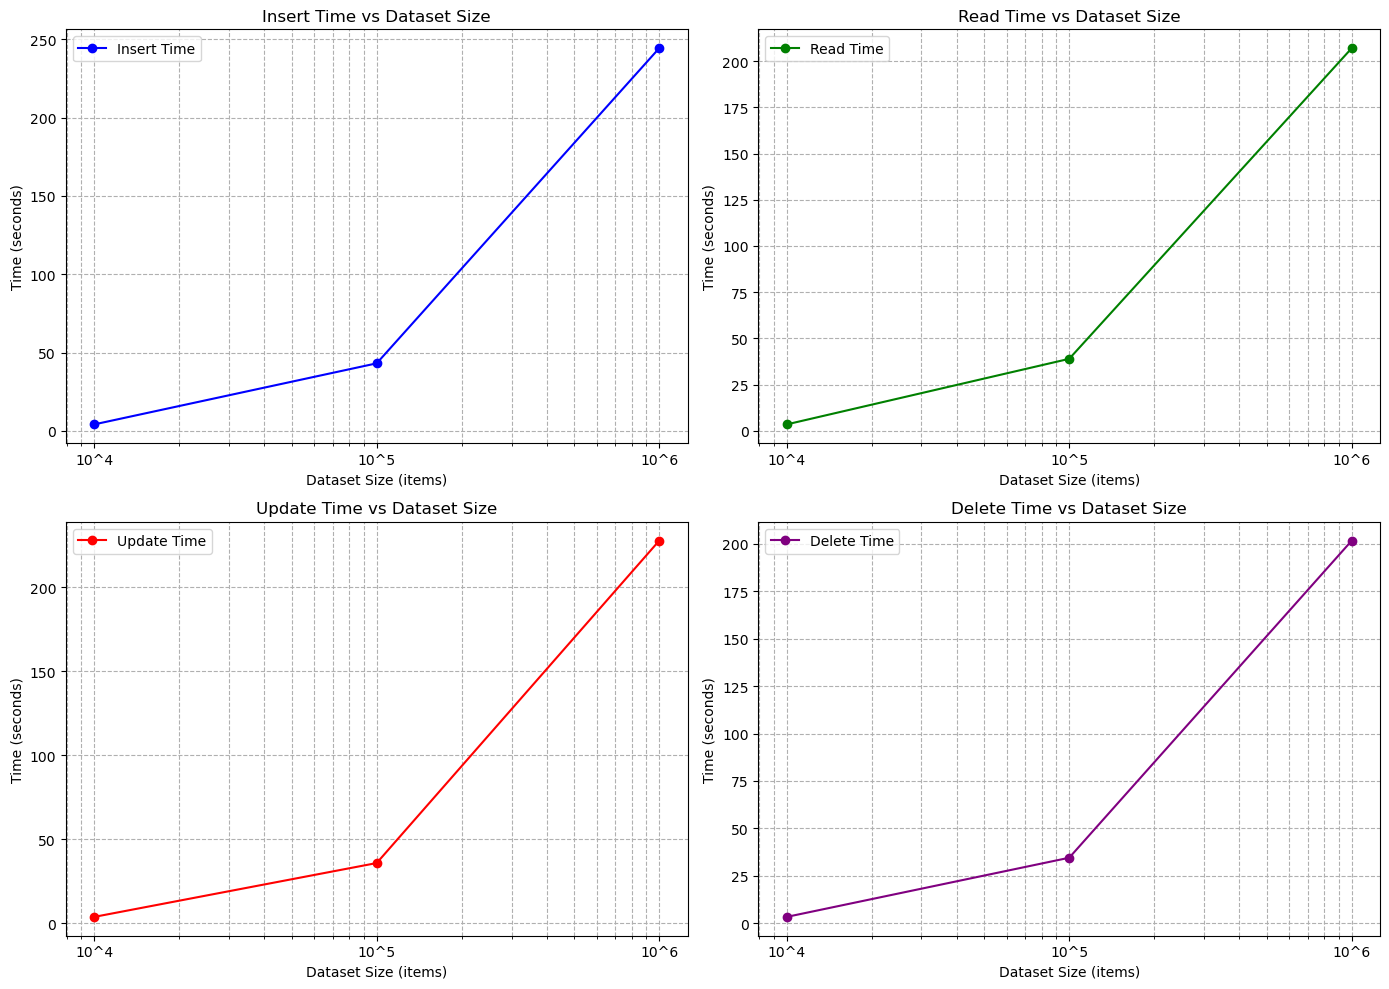

In [ ]:
import matplotlib.pyplot as plt

# Dados dos benchmarks
dataset_sizes_1 = [10000, 100000, 1000000]  # 1x, 10x, 100x
insert_times_1 = [6.79, 71.82, 407.40]
read_times_1 = [5.75, 64.89, 345.00]
update_times_1 = [6.33, 59.80, 379.80]
delete_times_1 = [5.63, 57.59, 336.00]
# Dados dos benchmarks 2 CPU
dataset_sizes = [10000, 100000, 1000000]  # 1x, 10x, 100x
insert_times = [4.07, 43.09, 244.44]
read_times = [3.45, 38.93, 207.00]
update_times = [3.80, 35.88, 227.88]
delete_times = [3.38, 34.55, 201.60]


# Criando os gráficos
plt.figure(figsize=(14, 10))

# Gráfico de Insert
plt.subplot(2, 2, 1)
plt.plot(dataset_sizes, insert_times, marker='o', color='blue', label='Insert Time')
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xticks(dataset_sizes, labels=['10^4', '10^5', '10^6'])  # Rótulos personalizados
plt.title('Insert Time vs Dataset Size')
plt.xlabel('Dataset Size (items)')
plt.ylabel('Time (seconds)')
plt.grid(True, which="both", ls="--")
plt.legend()

# Gráfico de Read
plt.subplot(2, 2, 2)
plt.plot(dataset_sizes, read_times, marker='o', color='green', label='Read Time')
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xticks(dataset_sizes, labels=['10^4', '10^5', '10^6'])  # Rótulos personalizados
plt.title('Read Time vs Dataset Size')
plt.xlabel('Dataset Size (items)')
plt.ylabel('Time (seconds)')
plt.grid(True, which="both", ls="--")
plt.legend()

# Gráfico de Update
plt.subplot(2, 2, 3)
plt.plot(dataset_sizes, update_times, marker='o', color='red', label='Update Time')
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xticks(dataset_sizes, labels=['10^4', '10^5', '10^6'])  # Rótulos personalizados
plt.title('Update Time vs Dataset Size')
plt.xlabel('Dataset Size (items)')
plt.ylabel('Time (seconds)')
plt.grid(True, which="both", ls="--")
plt.legend()

# Gráfico de Delete
plt.subplot(2, 2, 4)
plt.plot(dataset_sizes, delete_times, marker='o', color='purple', label='Delete Time')
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xticks(dataset_sizes, labels=['10^4', '10^5', '10^6'])  # Rótulos personalizados
plt.title('Delete Time vs Dataset Size')
plt.xlabel('Dataset Size (items)')
plt.ylabel('Time (seconds)')
plt.grid(True, which="both", ls="--")
plt.legend()

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()
